In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [86]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
x_train.shape

(60000, 28, 28)

In [44]:
x_test.shape

(10000, 28, 28)

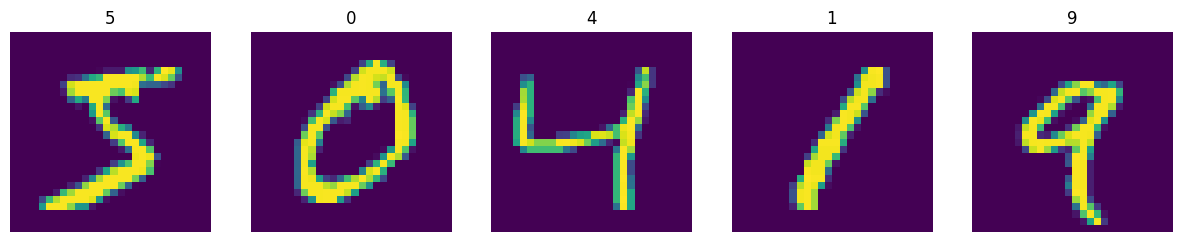

In [87]:
# Define class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plot the first 5 images from the training set
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
     axs[i].imshow(x_train[i])
     axs[i].set_title(class_names[int(y_train[i])])
     axs[i].axis('off')
plt.show()


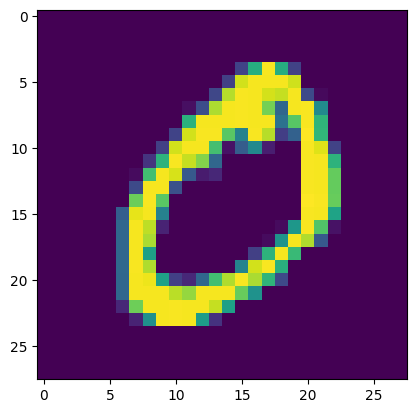

In [46]:
plt.imshow(x_train[1])


In [47]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Preprocess the data

In [54]:
#Normalize pixel values to range 0-1
# the pixel values in an image typically range from 0 to 255
# 1dividing all pixel values by 255 brings the pixel values to the range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [88]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [89]:
train_datagen = ImageDataGenerator(
 rotation_range=20, # Randomly rotate images up to 10 degrees
 width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
 height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
 horizontal_flip=True, # Randomly flip images horizontally
 vertical_flip=False, # Don't randomly flip images vertically
 shear_range=0.10, # crops part of the image
 zoom_range=0.10 # #zooms the image by 10%
)

In [90]:
#Fit the transformation to the training dataset

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

train_datagen.fit(x_train)

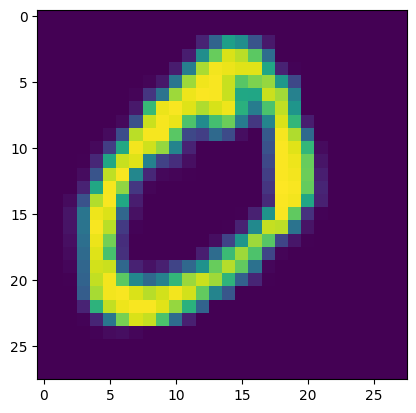

In [59]:
# showing sample of a transformation
plt.imshow(train_datagen.random_transform(x_train[1]))

### Build my model

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# Add the first pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Add the second pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

# Add the third pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the last convolutional layer
model.add(Flatten())

# Add the first fully connected layer
model.add(Dense(units=128, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer with 10 units and softmax activation for multiclass classification
model.add(Dense(units=10, activation='softmax'))

# Compile the model with categorical crossentropy loss and adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [65]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

### Compile the Model

In [ ]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
# categorical_crossentropy - loss function during model training
# accuracy - Evaluation measure
# SGD - Stochastic Gradient Descent
# learning_rate=0.001 specifies the step size of the updates to the weights during training.
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient an
# Higher values of momentum allow the optimizer to move more smoothly towards the global minimum
# and reduce the chance of getting stuck in local minima.
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


### Training and evaluation of the Model

In [ ]:
import keras
# Train the model with 20 epochs and batch size of 32
# to_categorical () converts integer class labels into one-hot encoded vectors;
# also used to convert predicted scores back into class labels for evaluation in classification problems
# batch_size=32: the training dataset is put into mini-batches of size 32.
#epochs=20: The model will be trained for 20 epochs;
#This means the dataset will be passed through the model 20 times for training.
history = model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
                    epochs=20, validation_data=(x_test, keras.utils.to_categorical(y_test)))


In [ ]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

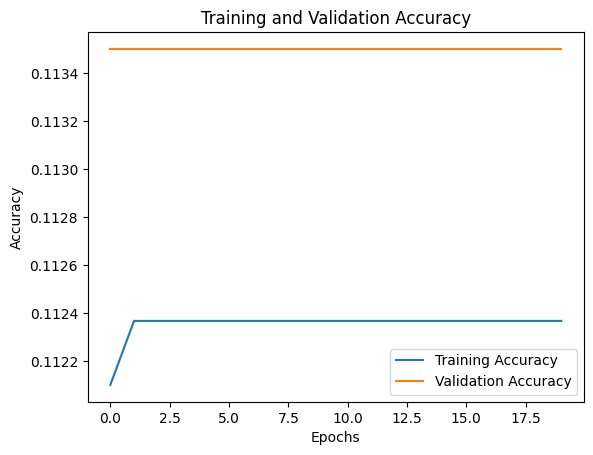

In [75]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

## Test the Model

In [76]:
# Predict the classes of the test set
#np.argmax(model.predict(x_test), axis=-1),
#this means that the argmax operation will be applied to the output predictions of the model along the l
#this is the class probabilities for each test instance.
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)


313/313 [==============================] - 2s 7ms/step


### Visualize the result

In [79]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



### Print the Confusion Matrix

<Figure size 2000x3000 with 0 Axes>

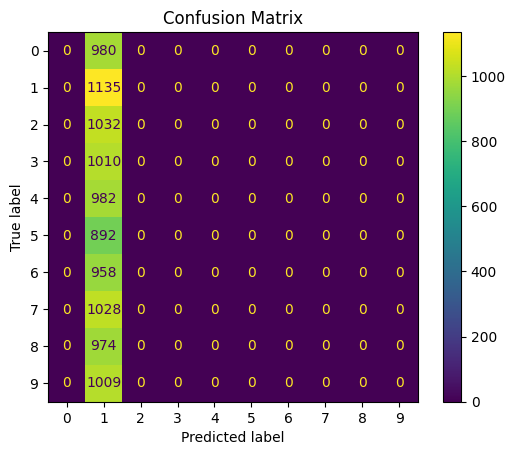

In [80]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

In [82]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

NameError: name 'Y_train' is not defined